In [2]:
import pandas as pd
import numpy as np
import mlcroissant as mlc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
data = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df = data.copy()
record_set_df.head()


  -  [Metadata(UK Optimal Product Price Prediction Dataset)] Property "https://schema.org/version" is recommended, but does not exist.


[RecordSet(uuid="amz_uk_price_prediction_dataset.csv")]


,amz_uk_price_prediction_dataset.csv/uid,amz_uk_price_prediction_dataset.csv/asin,amz_uk_price_prediction_dataset.csv/title,amz_uk_price_prediction_dataset.csv/stars,amz_uk_price_prediction_dataset.csv/reviews,amz_uk_price_prediction_dataset.csv/price,amz_uk_price_prediction_dataset.csv/isBestSeller,amz_uk_price_prediction_dataset.csv/boughtInLastMonth,amz_uk_price_prediction_dataset.csv/category
0,b'1',b'B09B96TG33',"b'Echo Dot (5th generation, 2022 release) | Bi...",4.7,15308,21.99,False,0,b'Hi-Fi Speakers'
1,b'2',b'B01HTH3C8S',"b'Anker Soundcore mini, Super-Portable Bluetoo...",4.7,98099,23.99,True,0,b'Hi-Fi Speakers'
2,b'3',b'B09B8YWXDF',"b'Echo Dot (5th generation, 2022 release) | Bi...",4.7,15308,21.99,False,0,b'Hi-Fi Speakers'
3,b'4',b'B09B8T5VGV',"b'Echo Dot with clock (5th generation, 2022 re...",4.7,7205,31.99,False,0,b'Hi-Fi Speakers'
4,b'5',b'B09WX6QD65',b'Introducing Echo Pop | Full sound compact Wi...,4.6,1881,17.99,False,0,b'Hi-Fi Speakers'


In [11]:
record_set_df.shape

(2443651, 9)

### Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?



In [ ]:
# Sports & outdoors is the most listed category with a 90% in the top 5 
# and a 30% frequency in the global list

#### Frequency Tables:

- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

In [6]:
# First change the name of the columns to make it more clear
record_set_df.columns = [col.lower().replace("amz_uk_price_prediction_dataset.csv/", "") for col in record_set_df.columns]
record_set_df.head(1)

,uid,asin,title,stars,reviews,price,isbestseller,boughtinlastmonth,category
0,b'1',b'B09B96TG33',"b'Echo Dot (5th generation, 2022 release) | Bi...",4.7,15308,21.99,False,0,b'Hi-Fi Speakers'


In [22]:
# Get the absolute frequency and relative frequency from category Serie
frequency_table = record_set_df["category"].value_counts()
relative_table = record_set_df["category"].value_counts(normalize=True)

category
b'Sports & Outdoors'                         836265
b'Beauty'                                     19312
b'Handmade Clothing, Shoes & Accessories'     19229
b'Bath & Body'                                19092
b'Birthday Gifts'                             18978
                                              ...  
b'Motorbike Chassis'                            107
b'Plugs'                                        107
b'Alexa Built-In Devices'                       107
b'Smart Home Security & Lighting'               104
b'Smart Speakers'                                54
Name: count, Length: 296, dtype: int64

In [16]:
# Create a new dataframe with the two Series above concatenated
df_frequency = pd.concat([frequency_table, relative_table], axis=1)
df_frequency.columns= ["absolute_frequency", "relative_frequency"]
df_frequency

,absolute_frequency,relative_frequency
category,,
b'Sports & Outdoors',836265,0.342219
b'Beauty',19312,0.007903
"b'Handmade Clothing, Shoes & Accessories'",19229,0.007869
b'Bath & Body',19092,0.007813
b'Birthday Gifts',18978,0.007766
...,...,...
b'Motorbike Chassis',107,0.000044
b'Plugs',107,0.000044
b'Alexa Built-In Devices',107,0.000044


In [29]:
# Top 5 most listed product categories
top_5_less = df_frequency[:5]
top_5_less

,absolute_frequency,relative_frequency
category,,
b'Sports & Outdoors',836265,0.342219
b'Beauty',19312,0.007903
"b'Handmade Clothing, Shoes & Accessories'",19229,0.007869
b'Bath & Body',19092,0.007813
b'Birthday Gifts',18978,0.007766


#### Visualizations:

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

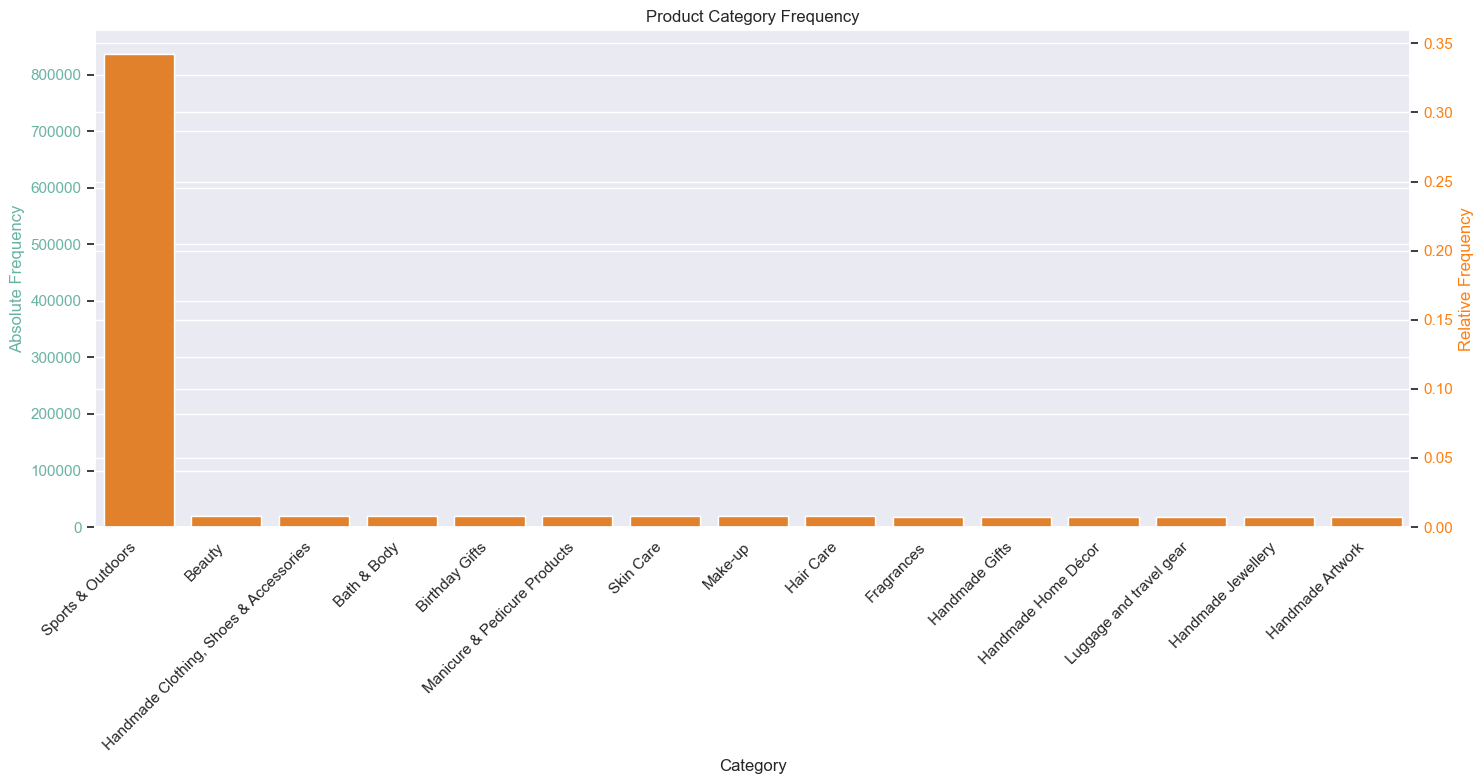

In [37]:
#Create the subset
top_15_less = df_frequency[:15]

# Set the plot style
sns.set_theme(style="darkgrid")

# Create a figure and an axis object
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot the absolute frequency (on the left y-axis)
sns.barplot(x=top_15_less.index, y=top_15_less['absolute_frequency'], ax=ax1, color='#69b3a2')
ax1.set_xlabel('Category')
ax1.set_ylabel('Absolute Frequency', color='#69b3a2')
ax1.tick_params(axis='y', labelcolor='#69b3a2')

# Create a secondary y-axis for relative frequency (on the right y-axis)
ax2 = ax1.twinx()
sns.barplot(x=top_15_less.index, y=top_15_less['relative_frequency'], ax=ax2, color='#ff7f0e')
ax2.set_ylabel('Relative Frequency', color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Set the title of the plot
plt.title('Product Category Frequency')

# Explicitly set the x-tick labels and rotate them
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# For the this bar plot we have the top 15 most listed product categories
# When getting them all in the same bar plot it wasn't very clear, for that I chose only 15
# However it is clear that there is one category that stands outs:
# Sports & outdoors is the most listed category 

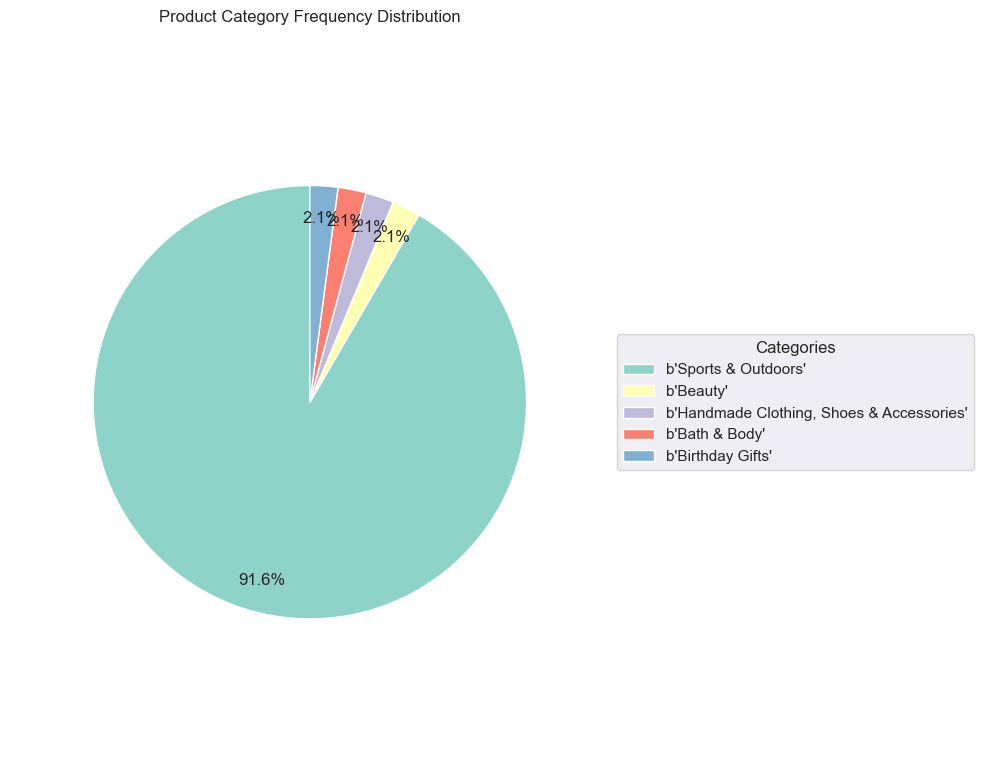

In [42]:
# Set the plot style
sns.set_theme(style="darkgrid")

# Extract only the absolute frequencies for the top categories
absolute_frequencies = top_5_less['absolute_frequency']

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 8))  # Increased size

# Plot the pie chart
wedges, texts, autotexts = ax.pie(absolute_frequencies, autopct='%1.1f%%', startangle=90, 
                                  colors=sns.color_palette("Set3", len(absolute_frequencies)), pctdistance=0.85)

# Remove labels from the pie chart
for text in texts:
    text.set_visible(False)

# Equal aspect ratio ensures that pie chart is drawn as a circle.
ax.axis('equal')

# Add a legend outside the pie chart to avoid overlap
ax.legend(wedges, top_5_less.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5))

# Set the title of the pie chart
plt.title('Product Category Frequency Distribution')

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# For the second plot we have the top 5 most listed product categories
# Sports & outdoors is the most listed category with a 90% in the top 5

### Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?


In [ ]:
# Prices are wide spread, there is a lot of variance
# However, the most common price ranges are between 5-20 pounds
# The price point can be found at 9.99 


#### Measures of Centrality::

- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [49]:
# Create a DataFrame to display the results of the measures of centrality to show it as a table

mean_value = record_set_df["price"].mean()
median_value = record_set_df["price"].median()
mode_value = record_set_df["price"].mode()[0]

centrality_table = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode'],
    'Value': [mean_value, median_value, mode_value]
})

round(centrality_table, 2)

,Statistic,Value
0,Mean,89.24
1,Median,19.09
2,Mode,9.99


In [48]:
# The mean is quite different from the mode, it seems that there is a possitive skewed distribution
record_set_df["price"].skew().round(2)

27.49

#### Measures of Dispersion:

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

In [50]:
# Create a DataFrame to display the results of the measures of dispersion to show it as a table

var_value = record_set_df["price"].var()
std_value = record_set_df["price"].std()
range_value = record_set_df["price"].max() - record_set_df["price"].min()
interquartile_value = record_set_df["price"].quantile(0.75) - record_set_df["price"].quantile(0.25)

dispersion_table = pd.DataFrame({
    'Statistic': ['Variance', 'STD', 'Range', 'Interquartile Range'],
    'Value': [var_value, std_value, range_value, interquartile_value]
})

round(dispersion_table, 2)

,Statistic,Value
0,Variance,119445.49
1,STD,345.61
2,Range,100000.00
3,Interquartile Range,36.00


In [ ]:
# As per Range we can see that there is a big difference between the most expensive product and the chepeast. 
# However there is not a huge differnece as we can see in the STD value or even the interquartile range
# Since this is a stewed data, interquartile range is a better indicator of spread, as it is not influenced by outliers
# To sum up, we can conclude that the range of prices is considerably wide. There is a big variety of prices.
# However interquartile suggests that the middle 50% of the data does not vary as much compared to the overall spread of the dataset

#### Visualizations:

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

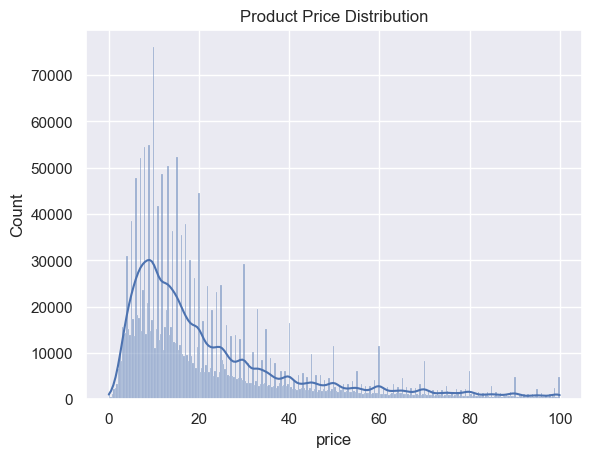

In [55]:
# Theses diagrams are hard to read since there are a lot of products and prices, and also there are a lot of outsiders and a big range of prices.
# It could be solver taking out these tails

# Calculate IQR (Interquartile Range)
Q1 = record_set_df["price"].quantile(0.25)
Q3 = record_set_df["price"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
trimmed_data = record_set_df["price"][(record_set_df["price"] >= lower_bound) & (record_set_df["price"] <= upper_bound)]

# Title
plt.title('Product Price Distribution')

# Plot the trimmed data
sns.histplot(trimmed_data, kde=True)
plt.show()

In [ ]:
# The hitogram is showing us that most of the prices are between 5 and 10 pounds

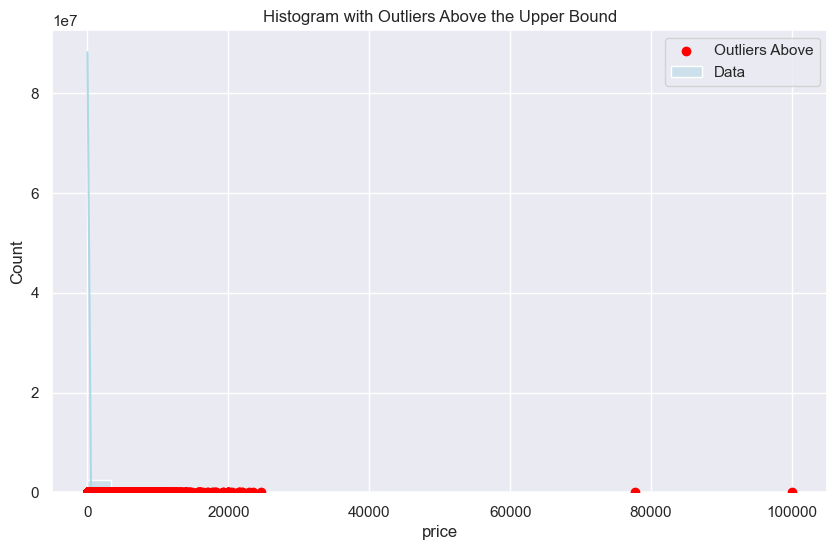

In [65]:
# Step 1: Calculate IQR (Interquartile Range)
Q1 = record_set_df["price"].quantile(0.25)  # First quartile (25th percentile)
Q3 = record_set_df["price"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1

# Step 2: Calculate the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify the outliers above the upper bound
outliers_above = record_set_df[record_set_df["price"] > upper_bound]

# Step 4: Plot the data with outliers above the upper bound
plt.figure(figsize=(10, 6))

# Plot the data (histogram + KDE curve)
sns.histplot(record_set_df["price"], kde=True, color='lightblue', label='Data', bins=30)

# Plot the outliers (above upper bound) on the same plot (scatter in red)
# Use plt.scatter to plot outliers as individual red points
plt.scatter(outliers_above["price"], np.zeros_like(outliers_above["price"]), color='red', label='Outliers Above', zorder=5)

# Add legend and title
plt.legend()
plt.title('Histogram with Outliers Above the Upper Bound')

# Show the plot
plt.show()

In [ ]:
# The outliers are far away from the most common values

### Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [ ]:
# Customers tend to rate high, the tendency is to rate around 4 stars

#### Measures of Centrality:

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

In [72]:
# Create a DataFrame to display the results of the measures of centrality to show it as a table

mean_value_r = record_set_df["stars"].mean()
median_value_r = record_set_df["stars"].median()
mode_value_r = record_set_df["stars"].mode()[0]

centrality_table_rate = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode'],
    'Value': [mean_value_r, median_value_r, mode_value_r]
})

round(centrality_table_rate, 2)

,Statistic,Value
0,Mean,2.15
1,Median,0.00
2,Mode,0.00


In [75]:
# It seems that the most common rate for products is 0 
# However when we take a look to the stars and reviews series in a random sample we can see that
# For almost every 0 star there is no review
record_set_df[["stars","reviews"]]


,stars,reviews
0,4.7,15308
1,4.7,98099
2,4.7,15308
3,4.7,7205
4,4.6,1881
...,...,...
2443646,0.0,0
2443647,0.0,0
2443648,0.0,0
2443649,4.3,404


In [7]:
# For that we are going to create another Series withou the rows of stars that are equal to 0 in the reviews
review_rate = record_set_df[record_set_df['reviews'] != 0]['stars']

mean_rate = review_rate.mean()
median_rate = review_rate.median()
mode_rate = review_rate.mode()[0]

centrality_table_rate = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode'],
    'Value': [mean_rate, median_rate, mode_rate]
})

round(centrality_table_rate, 2)

,Statistic,Value
0,Mean,4.32
1,Median,4.40
2,Mode,4.50


In [ ]:
# Once we have adjusted that, we can see that the most common rating for Amazon products is 4.5
# Mean, Median and Mode are alligned

#### Measures of Dispersion:

- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

In [77]:
# Create a DataFrame to display the results of the measures of dispersion to show it as a table
# We will use the review_rate Serie

var_value_r = review_rate.var()
std_value_r = review_rate.std()
range_value_r = review_rate.max() - review_rate.min()
interquartile_value_r = review_rate.quantile(0.75) - review_rate.quantile(0.25)

dispersion_table_rate = pd.DataFrame({
    'Statistic': ['Variance', 'STD', 'Range', 'Interquartile Range'],
    'Value': [var_value_r, std_value_r, range_value_r, interquartile_value_r]
})

round(dispersion_table_rate, 2)

,Statistic,Value
0,Variance,0.31
1,STD,0.56
2,Range,4.00
3,Interquartile Range,0.50


In [ ]:
# The ratings are very consistent STD and the interquartile range are low

#### Shape of the Distribution:

- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

In [78]:
# Skewness
# The skewness is negative meaning there is a longer tail on the left side of the distribution. 
# This means that lower stars are the least
review_rate.skew().round(2)

-2.38

In [79]:
# Kurtosis
# The distribution is leptokurtic (positive kurtosis). 
# It has thinner tails and a flatter peak, indicating more outliers
review_rate.kurtosis().round(2)

9.78

#### Visualizations:

- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

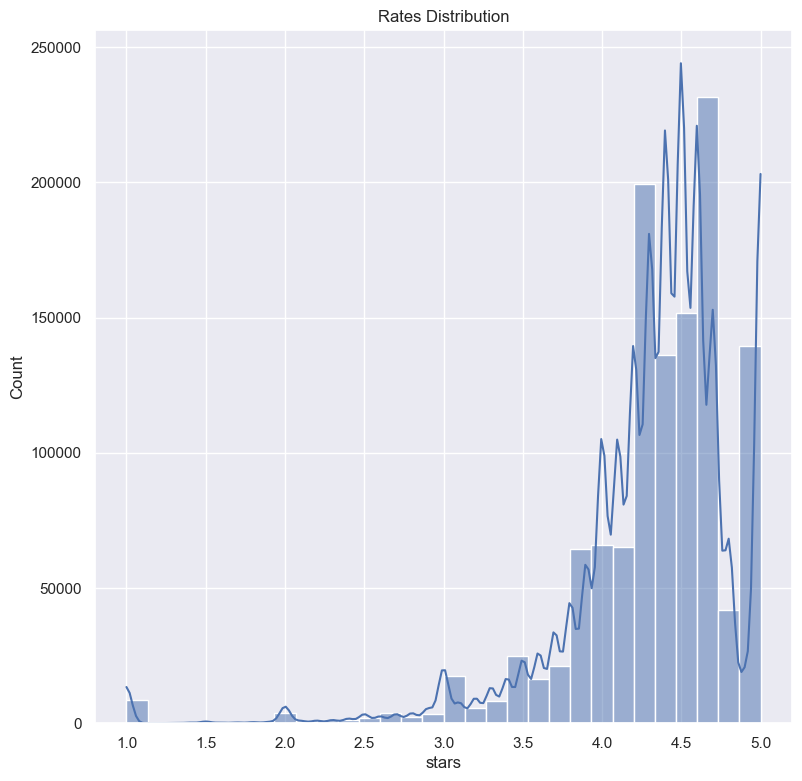

In [ ]:
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Plot the data (histogram + KDE curve)
sns.histplot(review_rate, kde=True, label='Rates', bins=30)

# Title
plt.title('Rates Distribution')

plt.show()

In [ ]:
# The most common rate would be 4.5

###  Business Report

1. "Sports & outdoors" is the most listed category taking the 90% of the top 5 and 30% of the global list.
2. Prices among the products are wide spread. There is a big difference between the most expensive product and the cheapest. However, the most common price is 9.99  pounds. And the most common price ranges are between 5 and 20 pounds.
3. The tendencies in the ratings are high scores. Customers tend to rate high, with the most common rating being 4.5.